In [1]:
import sys
import os
sys.path.append('/home/gamma/workspace/gammalib/area_eval')
sys.path.append('/home/gamma/workspace/gammalib/gammasim')
sys.path.append('/home/gamma/workspace/trapezoidal_shaper')

In [2]:
from configuration.model.config_model import load_config
from implementation.algorithm import TrapezoidalShaperAlg
from implementation.filt_param_handlers import read_trap_params


from gammasim import GammaSim

# TPS example

### Estimate scaling Factor 
Call gammasim with no noise data, only 1 peak

---

* [ ] eseguire il get_trigegr_threshold.py Dovrebbe aggiornare la config
* [ ] esegui il find_area_gain
* [ ] in teoria stessa altezza tra i primi due plot di plot_res. Devi assumere solo un picco per ogni waveform
* [ ] 


In [3]:
# config_siml = "config_method2-dummy.json"
config_siml = "config_method2-no-noise.json"

In [4]:
# !python /home/gamma/workspace/trapezoidal_shaper/configuration/get_trigger_thresholds.py /home/gamma/workspace/notebooks/falco/trapezoid/$config_siml
!python configuration/get_trigger_thresholds.py $config_siml

Percorso configurazione: config_method2-no-noise.json
Valore th_dy: 4
Valore th_d2y: 0.2
config_method2-no-noise.json
STEP 1: Generating the number of peaks for each sample
start_time: 1732213817.886284
stop_time:  1732213817.886348, total time for this step = 0.00006485

STEP 2: Generating parameters for each peak
start_time: 1732213817.886361
stop_time:  1732213817.889236, total time for this step = 0.00287437

STEP 3: Generating signals for each peak
start_time: 1732213817.889271
100%|██████████████████████████████████████| 100/100 [00:00<00:00, 16209.87it/s]
stop_time:  1732213817.899386, total time for this step = 0.01011467

STEP 4: Generating labels
start_time: 1732213817.899400
stop_time:  1732213817.901197, total time for this step = 0.00179768

STEP 5: Applying noise to dataset
start_time: 1732213817.901211
stop_time:  1732213817.911797, total time for this step = 0.01058626

TOTAL TIME FOR GENERATE DATASET = 0.02558041

(100, 2000)
CONFIGGGGG: /mnt/Windows/SHARED/ws_vscode/t

In [5]:
# config_trpz = f"/home/gamma/workspace/trapezoidal_shaper/configuration/config_tps_{config_siml}"
config_trpz = f"configuration/config_tps_{config_siml}"
!cat $config_trpz

{
    "gammasim_cfg": "config_method2-no-noise.json",
    "time_filter": {
        "alpha_l": 0.002,
        "alpha_h": 0.9,
        "gain_k": 0.0001,
        "in_cond": [
            100.0
        ],
        "th_dy": 4670.251262186187,
        "th_d2y": 2806535672.4438577,
        "dev_ord_det": 1,
        "zero_cr_window": 200,
        "window_sz": 15
    },
    "trap_filter": {
        "m": 110,
        "l": 30,
        "ftd_s": 20,
        "ftd_e": 30
    },
    "charge_int_filter": {
        "predelay": 100,
        "width": 400
    }
}

In [6]:
# Carica la configurazione

!echo $config_trpz 
!echo $PWD
cfg = load_config(config_trpz)
cfg

configuration/config_tps_config_method2-no-noise.json
/mnt/Windows/SHARED/ws_vscode/trapezoidal_shaper
config_tps_config_method2-no-noise.json
config_tps_config_method2-no-noise.json


Config(gammasim_cfg='config_method2-no-noise.json', time_filter=TimeFilterParams(alpha_l=0.002, alpha_h=0.9, gain_k=0.0001, in_cond=[100.0], th_dy=4670.251262186187, th_d2y=2806535672.4438577, dev_ord_det=1, zero_cr_window=200, window_sz=15), trap_filter=TrapFiltParams(m=110, l=30, ftd_s=20, ftd_e=30), charge_int_filter=ChargeIntParams(predelay=100, width=400))

In [7]:
cfg.time_filter.zero_cr_window = 200
cfg.trap_filter.m = 500
cfg.trap_filter.l = 10
# cfg.trap_filter.ftd_s = 5
# cfg.trap_filter.int_w = 5
# cfg

In [8]:
# Istanzio il simulatore GammaSim
saturation = False
gammasim = GammaSim(config_siml)
gammasim.generate_dataset(saturation)

STEP 1: Generating the number of peaks for each sample
start_time: 1732213818.605554
stop_time:  1732213818.605715, total time for this step = 0.00016093

STEP 2: Generating parameters for each peak
start_time: 1732213818.605727
stop_time:  1732213818.609137, total time for this step = 0.00340962

STEP 3: Generating signals for each peak
start_time: 1732213818.609189


  0%|          | 0/100 [00:00<?, ?it/s]

stop_time:  1732213818.630700, total time for this step = 0.02151179

STEP 4: Generating labels
start_time: 1732213818.630759
stop_time:  1732213818.633702, total time for this step = 0.00294280

STEP 5: Applying noise to dataset
start_time: 1732213818.633726
stop_time:  1732213818.643750, total time for this step = 0.01002359

TOTAL TIME FOR GENERATE DATASET = 0.03824425

(100, 2000)


In [9]:
# Crea l'istanza dell'algoritmo e calcola i risultati
ds = gammasim.get_dataset()
M = gammasim.get_params()[0][0]['tau2']
sampling_time=gammasim.get_sampling_time()
alg = TrapezoidalShaperAlg(dataset=ds, config=cfg, sampling_time=sampling_time, M=M)

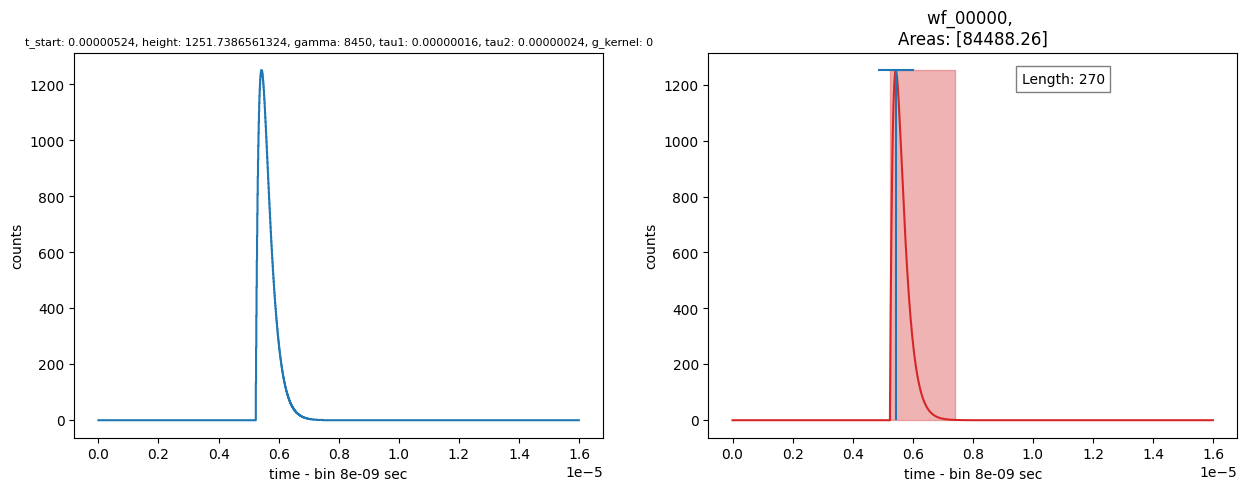

In [10]:
gammasim.plot_wf(0)

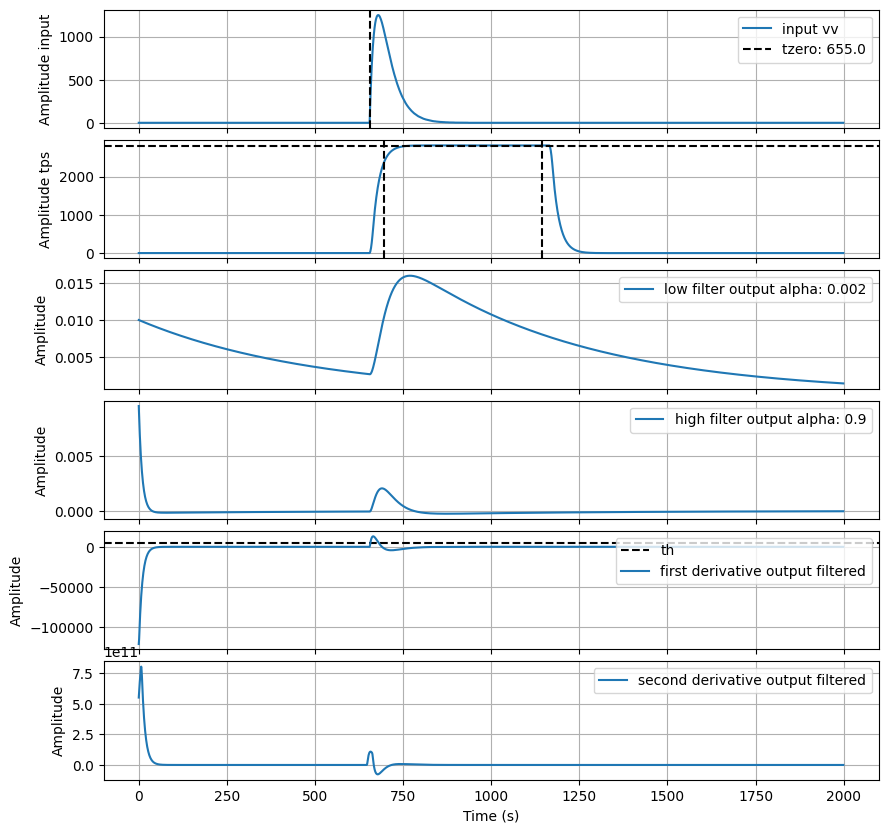

[2794.070422222223]

In [11]:

alg._compute(0, True)

In [12]:
csv_file="notebook_values.cfg"
gainnnnn=alg.find_gain(gammasim.get_gammas(), csv_file)
trap_heights = alg.compute_all()
# print(read_trap_params(csv_file))

In [13]:
import numpy as np


def v(tt, l, tau, theta):
    return l/(tau-theta)(np.exp(-tt/tau))

In [14]:
heights = gammasim.get_gammas()
heights

array([[8450.],
       [8459.],
       [6916.],
       [6930.],
       [8003.],
       [8784.],
       [6986.],
       [6855.],
       [8559.],
       [7594.],
       [9985.],
       [6668.],
       [8489.],
       [8754.],
       [8818.],
       [8841.],
       [9649.],
       [8255.],
       [6558.],
       [9120.],
       [6537.],
       [6835.],
       [7486.],
       [6348.],
       [7263.],
       [8301.],
       [7111.],
       [8883.],
       [8719.],
       [7828.],
       [8004.],
       [8570.],
       [6970.],
       [7766.],
       [9925.],
       [8635.],
       [9348.],
       [8276.],
       [8642.],
       [8167.],
       [9402.],
       [7052.],
       [6503.],
       [9050.],
       [8920.],
       [8992.],
       [6382.],
       [9222.],
       [7124.],
       [9561.],
       [6429.],
       [7109.],
       [8028.],
       [8830.],
       [7792.],
       [6621.],
       [9349.],
       [8165.],
       [9021.],
       [9299.],
       [7059.],
       [9899.],
       [

In [ ]:
alg.trap_heights_data

array([0.33060145])

visualize saved data

In [16]:
gammasim.get_params()[0][0]['g_kernel']

0.0

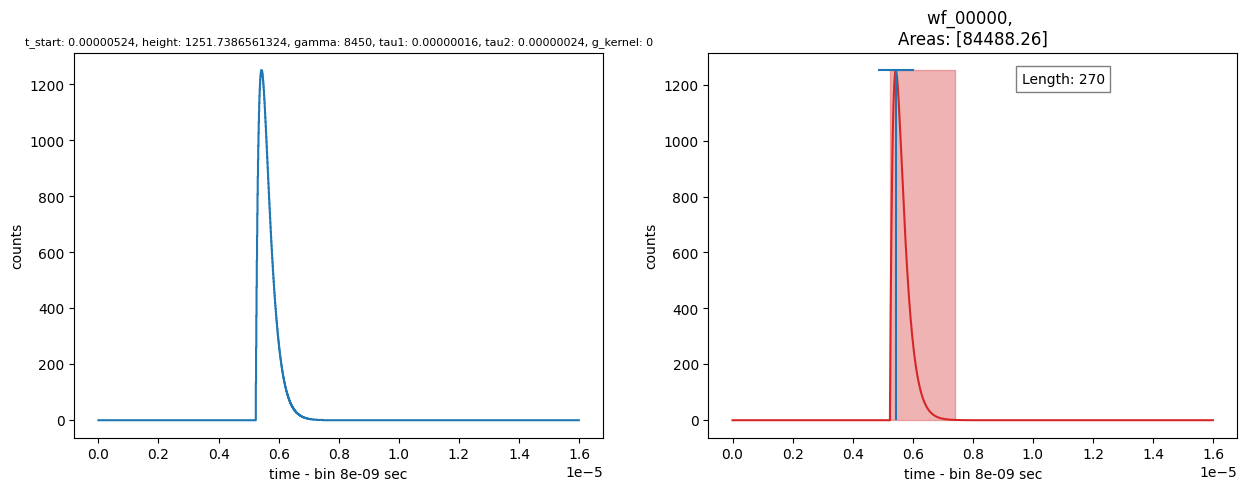

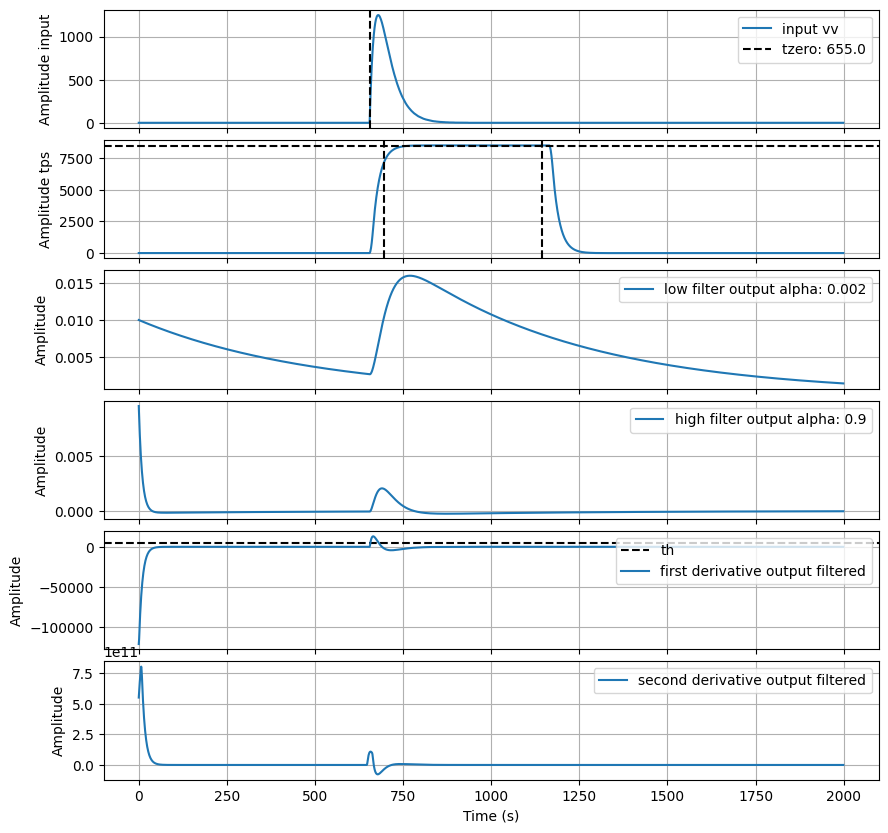

In [17]:
idx = 0
gammasim.plot_wf(idx)
alg.plot_results(idx)